This exploratory data analysis (EDA) was done using the TMDB 5000 Movie Dataset found at: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata. Specifically, this was done on the tmdb_5000_movies.csv file. 

Popularity of a movie is calculated based on:
 - Number of votes for the day
 - Number of views for the day
 - Number of users who marked it as a "favourite" for the day
 - Number of users who added it to their "watchlist" for the day
 - Release date
 - Number of total votes
 - Previous days score
 
For more info see https://developers.themoviedb.org/3/getting-started/popularity

In [1]:
import re
from io import StringIO 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import chisquare

sns.set(font_scale=1.2)
sns.set_style("whitegrid")


Sample of tmdb_5000_movies.csv: 

 <bound method NDFrame.head of          budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801          0                                                 []   
4802          0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
0                         

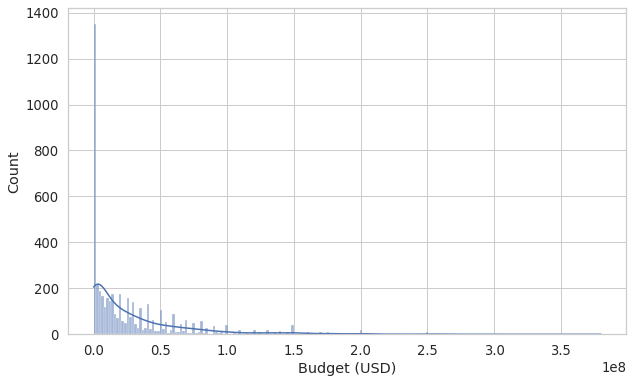

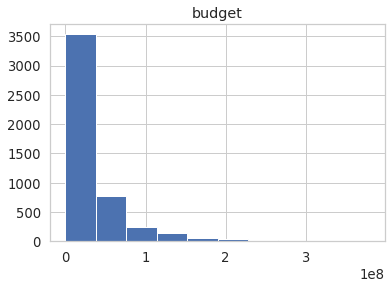

mode is:        budget      id  popularity  revenue  runtime  vote_average  vote_count
0        0.0       5    8.902102      0.0     90.0           6.0         0.0
1        NaN      11         NaN      NaN      NaN           6.5         NaN
2        NaN      12         NaN      NaN      NaN           NaN         NaN
3        NaN      13         NaN      NaN      NaN           NaN         NaN
4        NaN      14         NaN      NaN      NaN           NaN         NaN
...      ...     ...         ...      ...      ...           ...         ...
4798     NaN  426067         NaN      NaN      NaN           NaN         NaN
4799     NaN  426469         NaN      NaN      NaN           NaN         NaN
4800     NaN  433715         NaN      NaN      NaN           NaN         NaN
4801     NaN  447027         NaN      NaN      NaN           NaN         NaN
4802     NaN  459488         NaN      NaN      NaN           NaN         NaN

[4803 rows x 7 columns] 


mean is:  budget          2.904504e+07

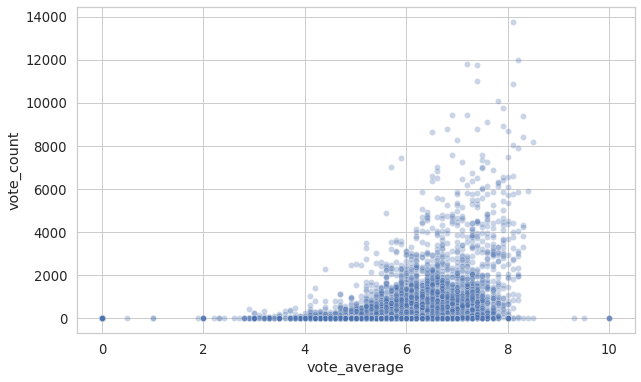

In [7]:
filename = 'tmdb_5000_movies.csv'
df_tmdb = pd.read_csv(filename)

print("\nSample of tmdb_5000_movies.csv: \n\n", df_tmdb.head)

# There are some null values, but not a ton
print("df_tmdb.insnull().sum() : ", df_tmdb.isnull().sum())

# Create basic histogram
fig = plt.figure(figsize=(10, 6))


sns.histplot(data=df_tmdb, x='budget', bins=200, kde=True)
plt.xlabel('Budget (USD)')
plt.ylabel('Count')
plt.show()

# trying to plot numVotes as a histogram doesn't really show well. --> FIX THIS!
df_tmdb.hist(column='budget')
plt.show()

# find mode of averageRating
print("mode is: ", df_tmdb.mode(numeric_only=True), "\n\n")

# find mean of averageRating
print("mean is: ", df_tmdb.mean(numeric_only=True), "\n\n")

# find top 20 movies by num of ratings
df_tmdb.nlargest(20, 'vote_average')

# Scatter plot of vote_average vs vote_count
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tmdb, x='vote_average', y='vote_count', alpha=0.3)
# df_tmdb.plot(title="Scatter plot of average rating vs num ratings", kind='scatter', x ='averageRating', y='numVotes')

plt.show()

<AxesSubplot:xlabel='vote_average', ylabel='budget'>

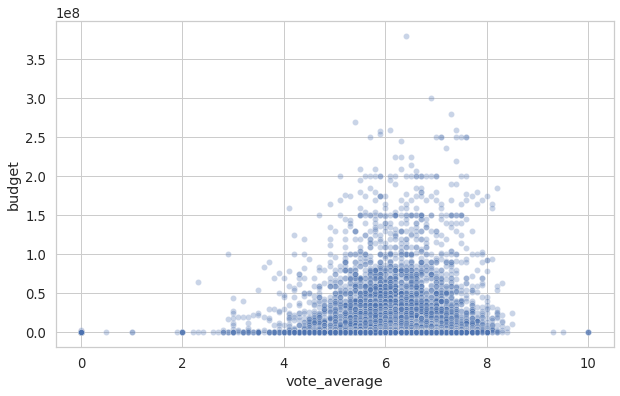

In [12]:
# Scatter plot of budget vs vote_average
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tmdb, x='vote_average', y='budget', alpha=0.3)

<AxesSubplot:xlabel='vote_average', ylabel='revenue'>

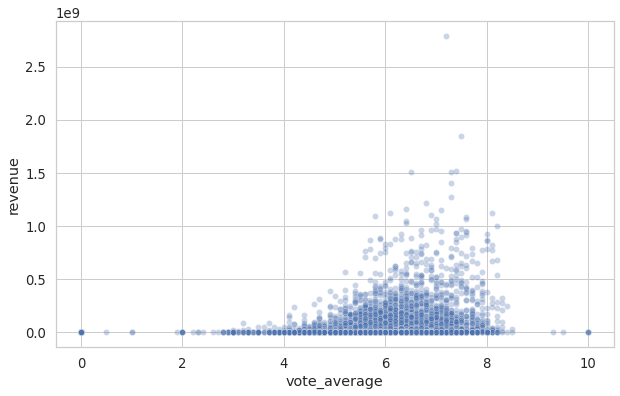

In [11]:
# Scatter plot of vote_average vs revenue
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tmdb, x='vote_average', y='revenue', alpha=0.3)


Basic Correlation Matrix
                 budget        id  popularity   revenue   runtime  \
budget        1.000000 -0.089377    0.505414  0.730823  0.269851   
id           -0.089377  1.000000    0.031202 -0.050425 -0.153536   
popularity    0.505414  0.031202    1.000000  0.644724  0.225502   
revenue       0.730823 -0.050425    0.644724  1.000000  0.251093   
runtime       0.269851 -0.153536    0.225502  0.251093  1.000000   
vote_average  0.093146 -0.270595    0.273952  0.197150  0.375046   
vote_count    0.593180 -0.004128    0.778130  0.781487  0.271944   

              vote_average  vote_count  
budget            0.093146    0.593180  
id               -0.270595   -0.004128  
popularity        0.273952    0.778130  
revenue           0.197150    0.781487  
runtime           0.375046    0.271944  
vote_average      1.000000    0.312997  
vote_count        0.312997    1.000000  


SeaBorn Correlation Matrix as Heatmap


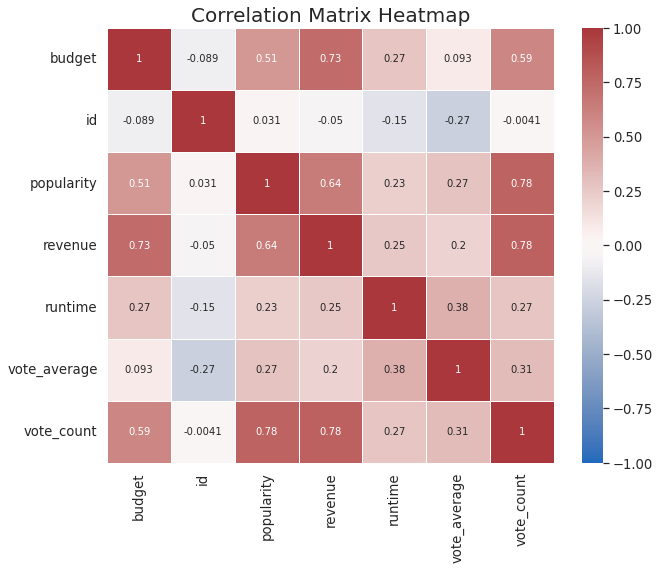

In [15]:
# Print basic correlation matrix
matrix = df_tmdb.corr()
print("\nBasic Correlation Matrix\n", matrix)

# Used https://datagy.io/python-correlation-matrix/ as a reference on 11/26/2022
print("\n\nSeaBorn Correlation Matrix as Heatmap")
mask = np.triu(np.ones_like(matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', linewidths=.5, ax=ax) 
plt.title("Correlation Matrix Heatmap", fontsize =20)
plt.show()